# 🔄 Pandas: Agrupaciones y Pivoteo - Parte 2

## 🎯 Objetivos de Aprendizaje

Al finalizar este notebook, serás capaz de:

- Aplicar operaciones de agrupación con `groupby()` para análisis segmentado
- Realizar agregaciones personalizadas en grupos de datos
- Crear tablas pivote para reorganizar y resumir información
- Utilizar métodos de pivoteo inverso (melt) para reestructurar datos
- Combinar múltiples DataFrames usando merge y join
- Aplicar transformaciones avanzadas en grupos de datos
- Realizar análisis exploratorio avanzado con técnicas de agrupación

## 📚 Contenido

1. **Operaciones GroupBy**
   - Concepto de "Split-Apply-Combine"
   - Agrupación por una o múltiples columnas
   - Funciones de agregación comunes

2. **Agregaciones Avanzadas**
   - Múltiples agregaciones simultáneas
   - Funciones de agregación personalizadas
   - Método `agg()` con diccionarios

3. **Transformaciones en Grupos**
   - Diferencia entre `transform()` y `apply()`
   - Normalización dentro de grupos
   - Cálculos relativos por grupo

4. **Tablas Pivote**
   - Método `pivot_table()`
   - Configuración de índices, columnas y valores
   - Funciones de agregación en pivotes

5. **Restructuración de Datos**
   - `pivot()` vs `pivot_table()`
   - `melt()` para transformar datos "wide" a "long"
   - `stack()` y `unstack()`

6. **Combinación de DataFrames**
   - `merge()`: Joins tipo SQL
   - `concat()`: Concatenación de DataFrames
   - Tipos de joins: inner, outer, left, right

7. **Casos Prácticos Avanzados**
   - Análisis de ventas por categorías
   - Comparaciones temporales
   - Análisis de cohortes básico

## 🛠️ Prerrequisitos

- Dominio de Pandas básico (DataFrame, Series, indexación)
- Conocimiento de operaciones básicas de Pandas
- Familiaridad con conceptos de bases de datos (recomendado)

## 📦 Librerías Utilizadas

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # Para visualizaciones
```

## 💡 Conceptos Clave

- **GroupBy**: Operación para dividir datos en grupos basados en criterios
- **Agregación**: Función que resume múltiples valores en uno solo
- **Pivoteo**: Reorganización de datos cambiando filas por columnas
- **Melt**: Transformación de formato "wide" (ancho) a "long" (largo)
- **Join**: Combinación de datos basada en claves comunes
- **Split-Apply-Combine**: Paradigma de dividir, aplicar función y combinar resultados

## 🎯 Metodología "Split-Apply-Combine"

```
DataFrame Original
       ↓ Split (Dividir)
Grupos por categoría
       ↓ Apply (Aplicar función)
Resultados por grupo
       ↓ Combine (Combinar)
DataFrame Resultado
```

## 🌟 ¿Por qué son importantes estas técnicas?

- **Análisis Segmentado**: Entender patrones en diferentes grupos
- **Reportes Ejecutivos**: Crear resúmenes y dashboards
- **Preparación de Datos**: Formato adecuado para machine learning
- **Eficiencia**: Operaciones optimizadas vs bucles manuales
- **Business Intelligence**: Responder preguntas de negocio complejas

## 📊 Tipos de Análisis que Aprenderás

- Ventas por región y período
- Performance por categoría de producto
- Análisis de comportamiento de clientes
- Tendencias temporales
- Comparaciones entre grupos

---

In [1]:
import pandas as pd
import numpy as np

In [2]:
# @title Creacion datos
data = {
    'Vendedor': ['Ana', 'Luis', 'Ana', 'Pedro', 'Luis', 'Ana', 'Pedro', 'Luis', 'Ana'],
    'Region': ['Norte', 'Sur', 'Norte', 'Este', 'Sur', 'Oeste', 'Este', 'Norte', 'Sur'],
    'Producto': ['A', 'B', 'A', 'C', 'B', 'C', 'A', 'A', 'B'],
    'Cantidad': [10, 5, 12, 8, 15, 7, 9, 11, 6],
    'Ingresos': [100, 75, 120, 90, 150, 60, 95, 115, 80]
}
df_ventas = pd.DataFrame(data)

ESTIMACIONES_URL_S3 = "https://storage.googleapis.com/humai-datasets/aws_s3/analisis_de_datos/2_Pivot_Table_y_Joins/ejercicios/estimaciones_agricolas.zip"
converters = {
    "id_provincia": lambda x: str(x).zfill(2),
    "id_departamento": lambda x: str(x).zfill(3),
}
df_agro = pd.read_csv(ESTIMACIONES_URL_S3, encoding="utf8",converters=converters)

df_cambio_climatico = pd.read_csv('https://curso-data-science-verdadero-6to.s3.sa-east-1.amazonaws.com/csv/agriculture_2024.csv')


df_paro = pd.read_csv('https://storage.googleapis.com/humai-datasets/aws_s3/analisis_de_datos/3_Agrupacion_y_Agregacion/parodesprov.csv')
df_descripciones = pd.read_csv('https://storage.googleapis.com/humai-datasets/aws_s3/analisis_de_datos/3_Agrupacion_y_Agregacion/ejercicios/comunidades_descripcion.csv')
df_paro_spain = pd.merge(df_paro, df_descripciones, left_on='Cod_CCAA',right_on="Código")

df_buenos_aires = pd.read_csv("https://cdn.buenosaires.gob.ar/datosabiertos/datasets/secretaria-de-desarrollo-urbano/terrenos-valor-oferta/Terrenos-en-venta-2020.csv", encoding = "latin1", sep=",")


# Tipo de datos en pandas

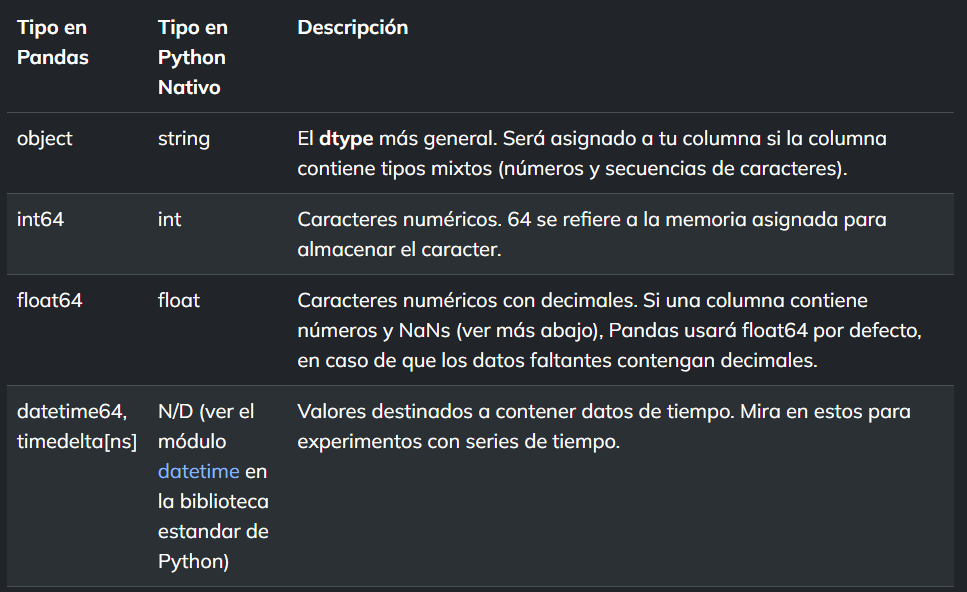

In [3]:
df_ventas.head()

,Vendedor,Region,Producto,Cantidad,Ingresos
0,Ana,Norte,A,10,100
1,Luis,Sur,B,5,75
2,Ana,Norte,A,12,120
3,Pedro,Este,C,8,90
4,Luis,Sur,B,15,150


In [4]:
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Vendedor  9 non-null      object
 1   Region    9 non-null      object
 2   Producto  9 non-null      object
 3   Cantidad  9 non-null      int64 
 4   Ingresos  9 non-null      int64 
dtypes: int64(2), object(3)
memory usage: 492.0+ bytes


# Agrupaciones con **groupby**

Es usado para agrupar grandes volumenes de datos y realizar opereaciones sobre ellos.
El método groupby() se basa en el paradigma **"Split-Apply-Combine"** (Dividir-Aplicar-Combinar):

<figure>
  <img src='https://www.w3resource.com/w3r_images/pandas-groupby-split-apply-combine.svg'>
  <figcaption align='right'></figcaption>
</figure>

1. Dividir (Split): El conjunto de datos se divide en grupos basados en uno o más criterios (claves).
2. Aplicar (Apply): Se aplica una función a cada grupo de forma independiente. Puede ser una función de agregación (sum, mean, count), transformación (transform) o filtrado (filter).
3. Combinar (Combine): Los resultados de la aplicación de la función a cada grupo se combinan en una nueva estructura de datos (generalmente un DataFrame o una Serie).

<figure>
  <img src='https://static.wixstatic.com/media/99d03c_7a2ee27525bd4bf7a534788fe924d4d1~mv2.jpg/v1/fill/w_364,h_337,al_c,lg_1,q_80,enc_avif,quality_auto/99d03c_7a2ee27525bd4bf7a534788fe924d4d1~mv2.jpg'>
  <figcaption align='right'></figcaption>
</figure>





In [5]:
# Sintaxis básica:

#df.groupby('columna_a_agrupar')
#df.groupby(['columna1', 'columna2'])

In [6]:
df_ventas.head()

,Vendedor,Region,Producto,Cantidad,Ingresos
0,Ana,Norte,A,10,100
1,Luis,Sur,B,5,75
2,Ana,Norte,A,12,120
3,Pedro,Este,C,8,90
4,Luis,Sur,B,15,150


##  Agrupar por una columna y calcular la suma
¿Cuántos ingresos generó cada vendedor?


In [7]:
ingresos_vendedor = df_ventas.groupby('Vendedor').sum()
ingresos_vendedor

,Region,Producto,Cantidad,Ingresos
Vendedor,,,,
Ana,NorteNorteOesteSur,AACB,35,360
Luis,SurSurNorte,BBA,31,340
Pedro,EsteEste,CA,17,185


In [8]:
ingresos_vendedor = df_ventas.groupby('Vendedor')['Ingresos'].sum()
ingresos_vendedor

,Ingresos
Vendedor,
Ana,360
Luis,340
Pedro,185


##  Agrupar por múltiples columnas y calcular la media
¿Cuál fue la cantidad promedio de productos vendidos por región y por producto?

In [9]:
cantidad_promedio_region_producto = df_ventas.groupby(['Region', 'Producto'])['Cantidad'].mean()
cantidad_promedio_region_producto

Region  Producto
Este    A            9.000000
        C            8.000000
Norte   A           11.000000
Oeste   C            7.000000
Sur     B            8.666667
Name: Cantidad, dtype: float64

##  Usar agg() para múltiples agregaciones
Para cada región, queremos saber la suma total de ingresos y la cantidad máxima de un producto vendido en una transacción.

In [10]:
agregaciones_region = df_ventas.groupby('Region').agg(
    Suma_Ingresos=('Ingresos', 'sum'),
    Max_Cantidad_Vendida=('Cantidad', 'max')
)
agregaciones_region

,Suma_Ingresos,Max_Cantidad_Vendida
Region,,
Este,185,9
Norte,335,12
Oeste,60,7
Sur,305,15


##  Resetear el índice
A veces, después de agrupar, las columnas por las que agrupamos se convierten en el índice. Si queremos que vuelvan a ser columnas regulares, usamos reset_index().

In [11]:
ingresos_vendedor = df_ventas.groupby('Vendedor')['Ingresos'].sum()
ingresos_vendedor

,Ingresos
Vendedor,
Ana,360
Luis,340
Pedro,185


In [12]:
ingresos_vendedor_df = df_ventas.groupby('Vendedor')['Ingresos'].sum().reset_index()
ingresos_vendedor_df

,Vendedor,Ingresos
0,Ana,360
1,Luis,340
2,Pedro,185


## Ejercicios

### Punto 1

In [13]:
df_paro_spain = df_paro_spain[~df_paro_spain.PAD_1_COD_PROV.isnull()]
df_paro_spain.head()

,OBJECTID,Codigo,Texto,Cod_Prov,Cod_CCAA,TotalParoRegistrado,PAD_1C02,PAD_1_COD_PROV,PAD_1_COD_CCAA,Shape__Area,Shape__Length,Codigop,Código,Literal
0,1,1001,Alegría-Dulantzi,1,16,184.0,2856.0,Araba/Álava,16.0,3.709269e+07,48191.568537,1.0,16,País Vasco
1,2,1002,Amurrio,1,16,766.0,10260.0,Araba/Álava,16.0,1.799114e+08,90623.621986,1.0,16,País Vasco
2,3,1003,Aramaio,1,16,18.0,1502.0,Araba/Álava,16.0,1.377066e+08,58592.914048,1.0,16,País Vasco
3,4,1004,Artziniega,1,16,110.0,1840.0,Araba/Álava,16.0,5.130078e+07,31498.524044,1.0,16,País Vasco
4,5,1006,Armiñón,1,16,12.0,234.0,Araba/Álava,16.0,2.380288e+07,33293.805036,1.0,16,País Vasco


In [14]:
df_paro_spain.shape

(8125, 14)

1. Construir el DataFrame de comunidades autónomas, incluyendo la densidad, la proporción de paro y la cantidad de municipios.

2. El promedio de la proporción de desempleo en los municipios presenta una densidad menor que la mediana. ¿Ocurre lo mismo en el caso de las provincias?

3. ¿Cuál es la comunidad autónoma con mayor cantidad de municipios?

### Punto 2

In [15]:
df_buenos_aires.head()

,DIRECCION,PROPIEDADS,PRECIOUSD,PRECIOPESO,DOLARM2,PESOSM2,COTIZACION,TRIMESTRE_,BARRIO,COMUNA_
0,RIVADAVIA 3500,190,150000,12000000,790,63158,80,CUARTO,ALMAGRO,5
1,PRINGLES 100,242,230000,18400000,950,76033,80,CUARTO,ALMAGRO,5
2,"PERON, JUAN DOMINGO, TTE. 3400",211,265000,21200000,1256,100474,80,CUARTO,ALMAGRO,5
3,MEXICO 4000,320,300000,24000000,938,75000,80,CUARTO,ALMAGRO,5
4,VENEZUELA 4067,250,305000,24400000,1220,97600,80,CUARTO,ALMAGRO,5


1. ¿Cuál es el precio medio del metro cuadrado en la Ciudad de Buenos Aires?

3. ¿Se puede calcular el tamaño de las propiedades? M**2 LA COLUMNA SE DEBE LLAMAR TAMANIO

4. ¿Cuál sería el precio promedio de las propiedades para cada decil, según metros cuadrados?

In [16]:
#para usar deciles se realiaza el metodo
#pd.qcut(10)

5. ¿Cuáles son los barrios más caros en términos de precios por metro cuadrado? ¿Y los más baratos?

# Pivot Table

Las tablas dinámicas son una forma de resumir y analizar datos que es muy popular en hojas de cálculo como Excel. Pandas nos ofrece la función pivot_table() para crear este tipo de tablas fácilmente.

Una tabla dinámica toma valores de una columna y los "pivota" para que se conviertan en nuevas columnas en la tabla resultante. Es una forma más flexible y potente de realizar agrupaciones.

In [17]:
# Sintaxis basicas
# pd.pivot_table(df, values='col_valores', index='col_filas', columns='col_columnas', aggfunc='sum')

In [18]:
df_ventas.head()

,Vendedor,Region,Producto,Cantidad,Ingresos
0,Ana,Norte,A,10,100
1,Luis,Sur,B,5,75
2,Ana,Norte,A,12,120
3,Pedro,Este,C,8,90
4,Luis,Sur,B,15,150


In [19]:
pivot_ingresos_vendedor_region = pd.pivot_table(
    df_ventas,
    values='Ingresos',
    index='Vendedor',
    columns='Region',
    aggfunc='sum'
)
pivot_ingresos_vendedor_region

Region,Este,Norte,Oeste,Sur
Vendedor,,,,
Ana,NaN,220.0,60.0,80.0
Luis,NaN,115.0,NaN,225.0
Pedro,185.0,NaN,NaN,NaN


##  Se rellenan los valores que no estan disponibles o no calculables
Vemos que aparecen NaN donde no hay combinación

In [20]:
pivot_ingresos_vendedor_region_fill = pd.pivot_table(
    df_ventas,
    values='Ingresos',
    index='Vendedor',
    columns='Region',
    aggfunc='sum',
    fill_value=0
)
pivot_ingresos_vendedor_region_fill

Region,Este,Norte,Oeste,Sur
Vendedor,,,,
Ana,0,220,60,80
Luis,0,115,0,225
Pedro,185,0,0,0


## Múltiples valores y funciones de agregación:
Queremos ver la suma de Ingresos y la media de Cantidad por Producto (filas) y Region (columnas).

In [21]:
pivot_multi_valores_agg = pd.pivot_table(
    df_ventas,
    index='Producto',
    columns='Region',
    aggfunc={
        'Ingresos': 'sum',
        'Cantidad': 'mean'
    },
    fill_value=0
)

pivot_multi_valores_agg

Cantidad                       Ingresos                 
Region       Este Norte Oeste       Sur     Este Norte Oeste  Sur
Producto                                                         
A             9.0  11.0   0.0  0.000000       95   335     0    0
B             0.0   0.0   0.0  8.666667        0     0     0  305
C             8.0   0.0   7.0  0.000000       90     0    60    0

## Múltiples valores y funciones de agregación:
Calcular la suma de Cantidad por Vendedor y Producto, incluyendo totales.

In [22]:
pivot_con_margenes = pd.pivot_table(
    df_ventas,
    index='Vendedor',
    columns='Producto',
    values='Cantidad',
    aggfunc='sum',
    fill_value=0,
    margins=True,       # Añadir subtotales
    margins_name='Total General' # Nombre para los subtotales
)
pivot_con_margenes

Producto,A,B,C,Total General
Vendedor,,,,
Ana,22,6,7,35
Luis,11,20,0,31
Pedro,9,0,8,17
Total General,42,26,15,83


## Ejercicios

### Parte 1

In [23]:
df_agro[['campania_inicio','campania_final']] = df_agro.campaña.str.split('/',n=1,expand=True)
df_agro["campania_inicio"] = df_agro["campania_inicio"].astype(int)
df_agro["campania_final"] = df_agro["campania_final"].astype(int)
df_agro.head()

,id_provincia,provincia,id_departamento,departamento,id_cultivo,cultivo,id_campaña,campaña,sup_sembrada,sup_cosechada,produccion,rendimiento,campania_inicio,campania_final
0,06,BUENOS AIRES,854,25 DE MAYO,1,Ajo,1,1969/1970,3,3,10,3333,1969,1970
1,06,BUENOS AIRES,854,25 DE MAYO,1,Ajo,2,1970/1971,1,1,3,3000,1970,1971
2,06,BUENOS AIRES,014,ADOLFO GONZALES CHAVES,1,Ajo,1,1969/1970,15,15,82,5467,1969,1970
3,06,BUENOS AIRES,014,ADOLFO GONZALES CHAVES,1,Ajo,2,1970/1971,10,10,55,5500,1970,1971
4,06,BUENOS AIRES,014,ADOLFO GONZALES CHAVES,1,Ajo,3,1971/1972,8,8,44,5500,1971,1972


1. Cuales son los años que analizamos? Hasta cuando?

In [24]:
# Investigar unique de pandas

2. ¿Cuál es la producción agrícola total en cada año?

3. Enfoquémonos en un período específico, por ejemplo, la campaña "2017/2018":
* ¿Cuál fue la producción promedio del cultivo de soja en los departamentos que la sembraron en ese período?
* ¿Cuál es y en qué departamento está el rendimiento (kg por hectárea) mínimo, mediano y máximo en la provincia de Buenos Aires? (La mediana es el valor que, si los datos están ordenados, queda en el centro de ellos)

4. Cuales fueron los años donde se obtuvo mayor produccion de cada cultivo? Y cuales los de mayor rendimiento?

### Parte 2

In [25]:
df_cambio_climatico.head()

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
0,2001,India,West Bengal,Corn,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,83.25,Water Management,808.13
1,2024,China,North,Corn,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,Crop Rotation,616.22
2,2001,France,Ile-de-France,Wheat,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,67.78,Water Management,796.96
3,2001,Canada,Prairies,Coffee,27.85,1154.36,13.91,3.890,5,94.06,14.38,87.58,91.39,No Adaptation,790.32
4,1998,India,Tamil Nadu,Sugarcane,2.19,1627.48,11.81,1.080,9,95.75,44.35,88.08,49.61,Crop Rotation,401.72


1. Promedio de temperatura por pais en cada año

2. Cuales son las regiones mayor impacto economico

3. Cual fue la region con mayor cantidad de eventos extremos? Y cuantos eventos?

4. Los eventos extremos afectaron a los ingresos economicos? (Compararlo con su media)

5. Cual fue la region con menor cantidad de precipitacion? Y la mayor?

6. Cual cultivo tuvo mayor impacto economico?